## **Feature Selection and Dimensionality Reduction Techniques on California Housing Dataset**




In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
# Function to evaluate model performance using R-squared score and Mean Squared Error (MSE)
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)

    print("R-squared score:", r2)
    print("Mean Squared Error:", mse)

## **Supervised**

### **Filter Based Methods**

**Mutual Information**

In [20]:
dataset = fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [21]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [22]:
x = dataset['data']
y = dataset ['target']
feature_names = dataset['feature_names']

In [24]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
mi = mutual_info_regression(x,y,random_state=43)

In [25]:
x.shape

(20640, 8)

In [26]:
print(mi)

[0.38792528 0.03316623 0.1032511  0.02442028 0.02100028 0.07290862
 0.36920881 0.40190489]


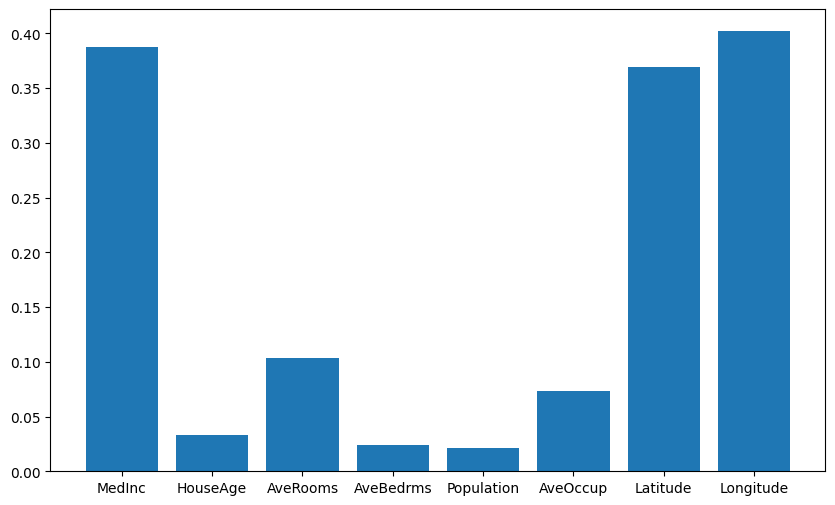

In [28]:
# Visualize Feature Selection
plt.figure(figsize = (10, 6))
plt.bar(feature_names,mi)
plt.show()

**We could use either SelectPercentile() or SelectBest() select the best features from the above mutual information.**

In [29]:
X_new = SelectKBest(mutual_info_regression, k = 5).fit_transform(x, y)
print(X_new.shape)

(20640, 5)


In [30]:
x_train, x_test,y_train, y_test = train_test_split(X_new, y, test_size=(0.20),random_state =43)

In [32]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
evaluate_model(y_test,y_pred)

R-squared score: 0.5912911717145897
Mean Squared Error: 0.5450061964960146


**The next filter based method is Chi Squared , but it can be used only for classification, so lets move on to Pearson Correlation**

**Pearson Correlation**

**Two ways of usage**

#### 1) Analyse each feature with the target variable

In [33]:
from sklearn.feature_selection import f_regression, SelectKBest

In [34]:
X_new = SelectKBest(f_regression, k=5).fit_transform(x,y)

In [35]:
print(X_new.shape)

(20640, 5)


In [36]:
x_train, x_test,y_train, y_test = train_test_split(X_new, y, test_size=(0.20),random_state =43)

In [37]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
evaluate_model(y_test,y_pred)

R-squared score: 0.5602617170573737
Mean Squared Error: 0.5863834408609572


#### 2) Analyse the relationship between the feature themselves using the corr() method in pandas

In [38]:
import pandas as pd

In [39]:
x_pd = pd.DataFrame(x, columns = feature_names)
x_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [40]:
x_pd.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


######**From the above correlation matrix it is very clear that there is correlation between AveRooms and AveBedrms and also the Latitude and Longitude are negatively correlated**

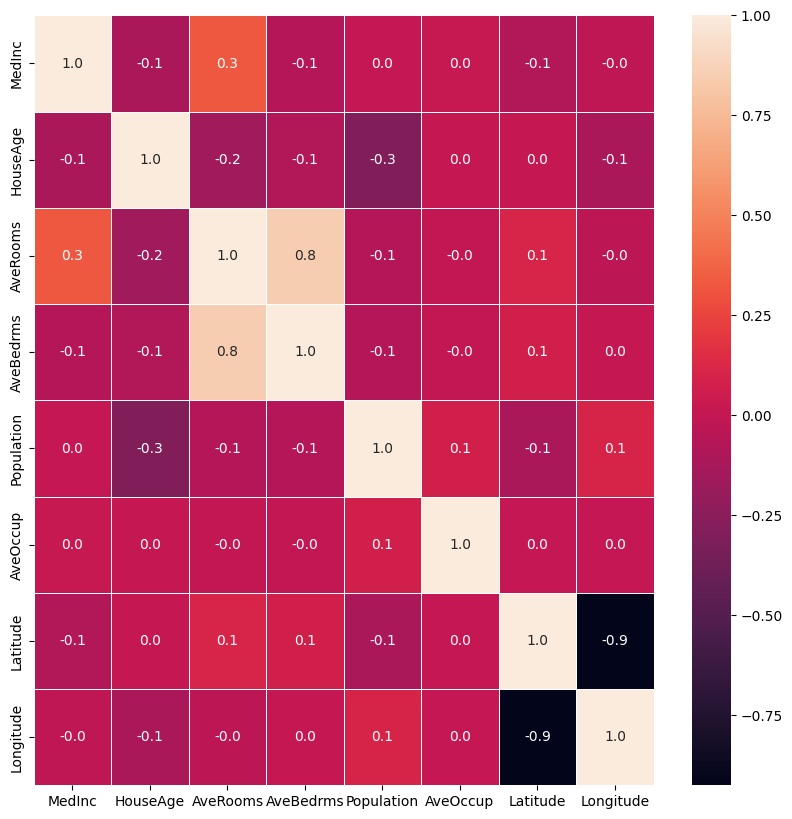

In [41]:
#correlation map
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(x_pd.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

In [42]:
# Drop AveBedrooms column
x_new = x_pd.drop('AveBedrms',axis =1)
x_new.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25


In [43]:
x_train, x_test,y_train, y_test = train_test_split(X_new, y, test_size=(0.20), random_state=43)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
evaluate_model(y_test,y_pred)

R-squared score: 0.5602617170573737
Mean Squared Error: 0.5863834408609572


### **Wrapper Based Methods for feature selection**

#### **Recursive Feature Elimination**

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
estimator = Lasso()
selector = RFE(estimator, n_features_to_select = 5, step =1).fit(X,y)
print(selector.ranking_)
print(selector)

[1 1 4 3 1 2 1 1]
RFE(estimator=Lasso(), n_features_to_select=5)


In [47]:
X_new = selector.transform(X)
print(X_new.shape)

(20640, 5)


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.20,random_state=43)

In [49]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
evaluate_model(y_test,y_pred)

R-squared score: 0.6027870853411594
Mean Squared Error: 0.5296765932986786


####**Select From Model**

In [50]:
# Using estimators that assign weights to the features
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas = np.logspace(-6,6, num=5)).fit(X,y)
importance = np.abs(ridge.coef_)
feature_names = np.array(fetch_california_housing().feature_names)

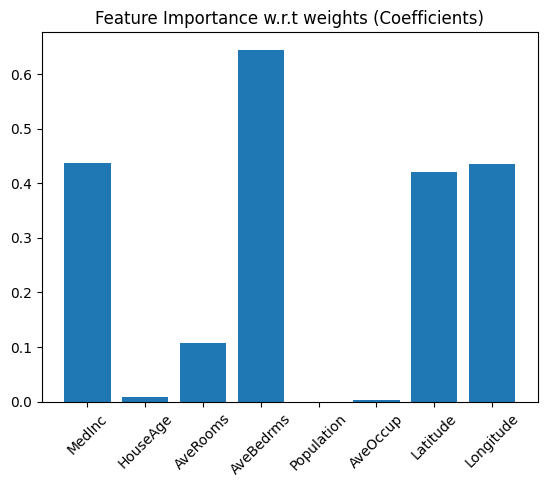

In [51]:
plt.bar(height = importance,x = feature_names)
plt.title("Feature Importance w.r.t weights (Coefficients)")
plt.xticks(rotation = 45)
plt.show()

**Based on importance we select the top 4 important features according to the coefficients.**

In [52]:
from sklearn.feature_selection import SelectFromModel
threshold = np.sort(importance)[-5] + 0.01 # we want to set the threshold of the 5th highest coefficient
# "+ 0.01" helps in preventing potential exclusion of features that are very close in importance due to rounding errors
model_select = SelectFromModel(ridge, threshold = threshold).fit(X,y)
print(f"Features selected by SelectFromModel : {feature_names[model_select.get_support()]}")

Features selected by SelectFromModel : ['MedInc' 'AveBedrms' 'Latitude' 'Longitude']


**Sequential Feature Selection**

In [53]:
from sklearn.feature_selection import SequentialFeatureSelector
X,y = fetch_california_housing(return_X_y=True)

In [54]:
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select = 4, direction ="forward").fit(X,y)
sfs_backward = SequentialFeatureSelector(ridge,n_features_to_select=4, direction ="backward").fit(X,y)
print(f"Features selected by forward sequential selection : {feature_names[sfs_forward.get_support()]}")
print(f"Features selected by backward sequential selection : {feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection : ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms']
Features selected by backward sequential selection : ['MedInc' 'HouseAge' 'Latitude' 'Longitude']


We notice that the forward and backward sequential selection have come up with different set of features.

Testing the model using the features from the sfs_forward object

In [55]:
X_new = sfs_forward.transform(X)
X_new.shape

(20640, 4)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2,random_state =43 )
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
evaluate_model(y_test, y_pred)

R-squared score: 0.5594921554932742
Mean Squared Error: 0.5874096379773222


Testing the model using the features from sfs_backward object

In [57]:
X_new = sfs_backward.transform(X)
X_new.shape

(20640, 4)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2,random_state=43)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
evaluate_model(y_test, y_pred)

R-squared score: 0.6028208055323141
Mean Squared Error: 0.52963162800345


As we can infer from the above, the lower MSE and higher R2 score achieved through backward selection indicate its superiority over forward selection.

### **Embedded Methods**


*   As a function of the algorithm, feature selection automatically happens.
*   Eg: Lasso Regularisation, Random-Forest



##### **Lasso Regularization**

In [61]:
X , y = fetch_california_housing(return_X_y=True)
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=43)

In [62]:
w = []
r2 = []
mse =[]
alpha_list = [0, 0.1,0.25, 0.5,1, 2]

for alpha in alpha_list:
    #fit model
    model = Lasso(alpha = alpha)
    model.fit(x_train, y_train)

    # prediction
    y_pred = model.predict(x_test)

    # store metrics for prediction, for each fit
    r2.append(r2_score(y_test, y_pred))
    w.append(model.coef_.tolist())
    mse.append(mean_squared_error(y_test,y_pred))

<ipython-input-62-c778a0e0aa0b>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.360e+03, tolerance: 2.198e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [63]:
feature_names = fetch_california_housing().feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

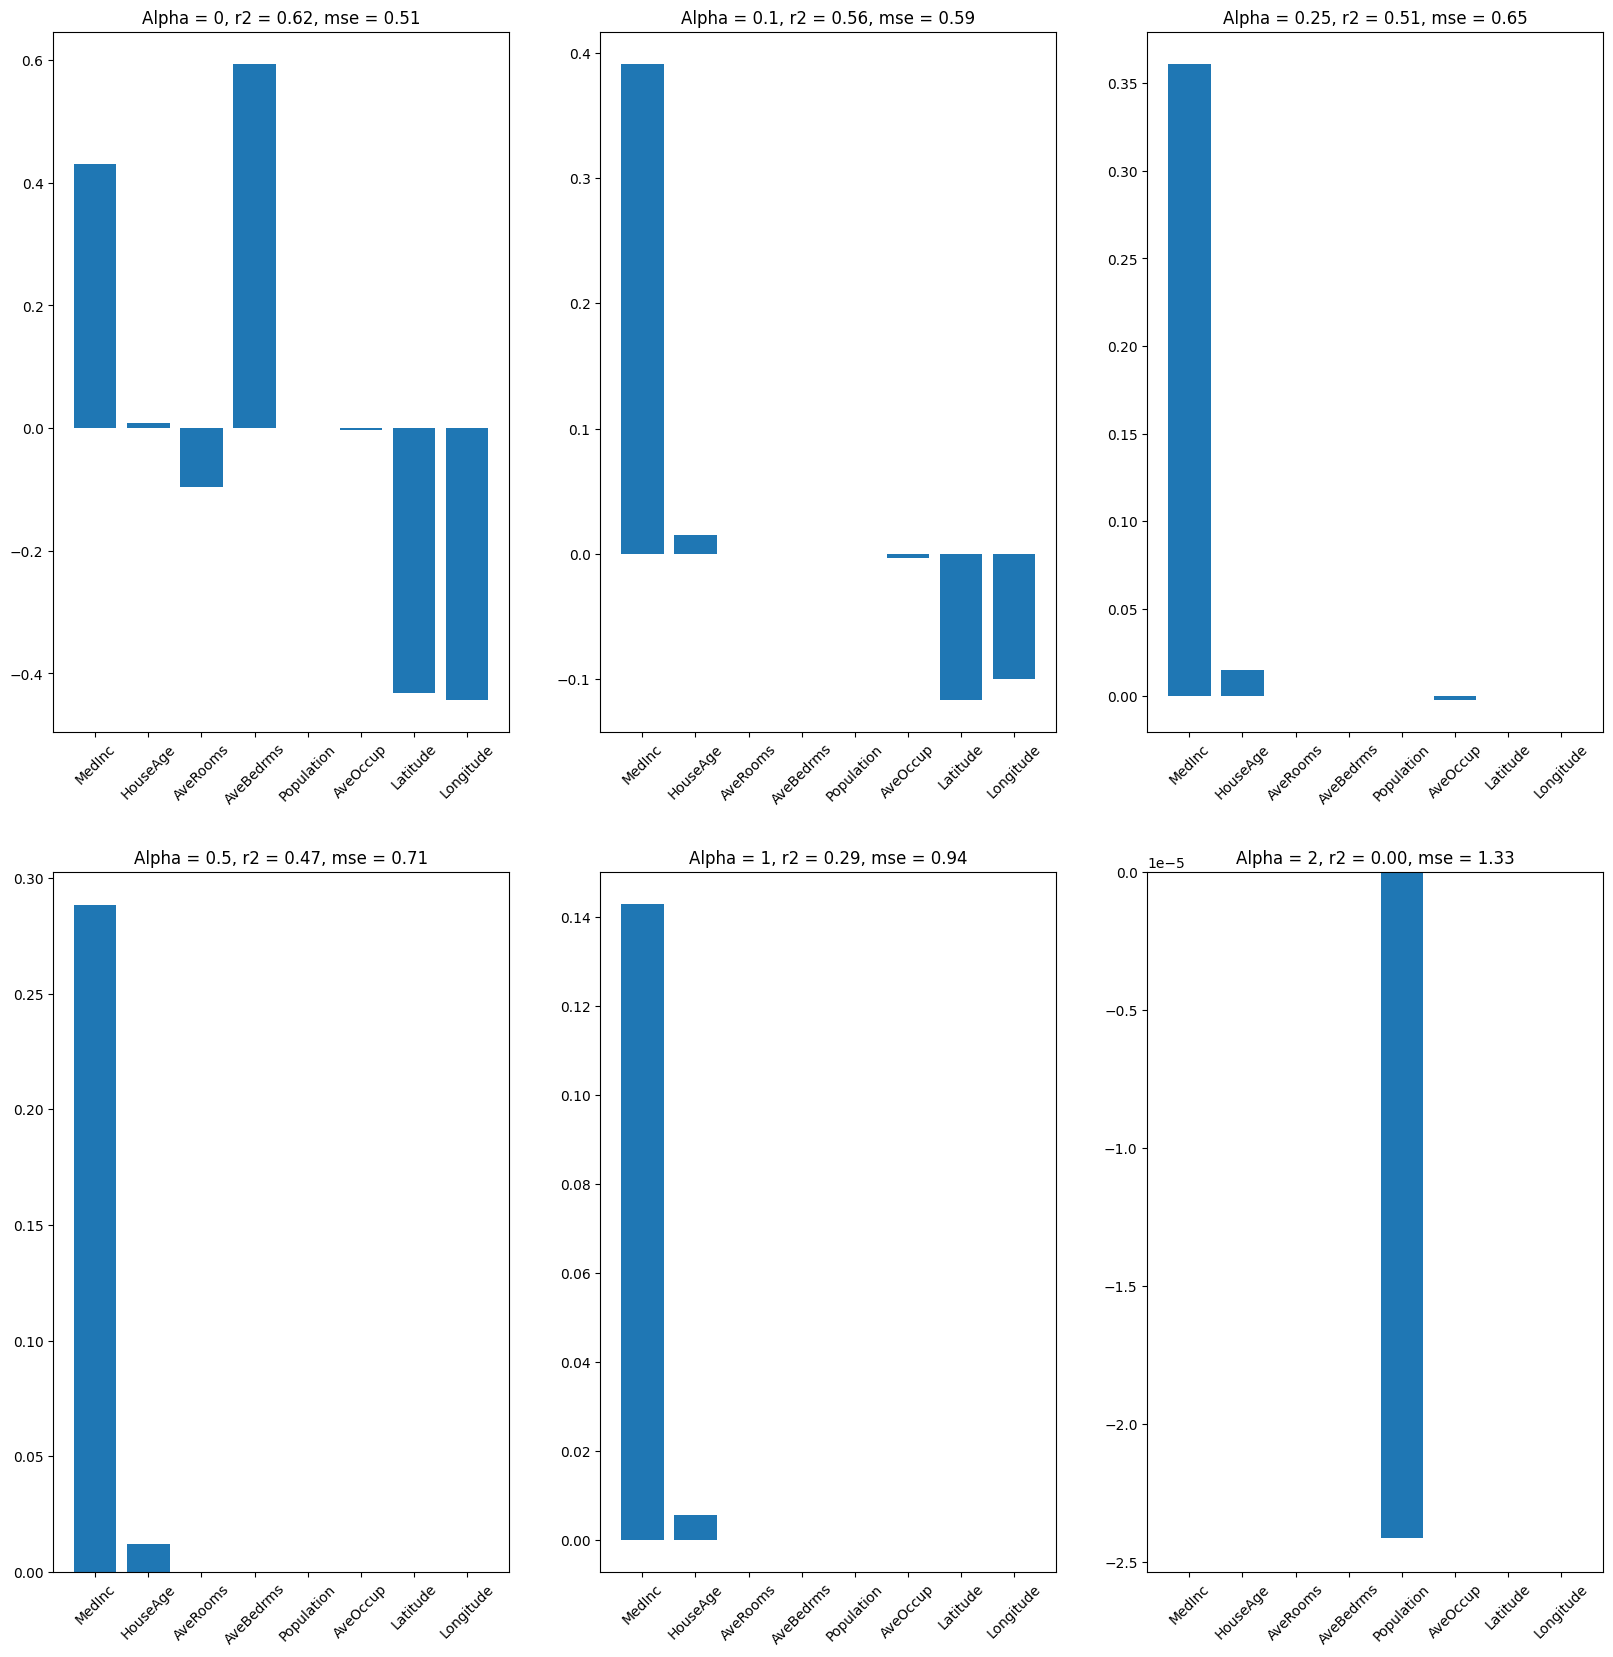

In [69]:
# visualizing feature selection
plt.figure(figsize=(20, 20))
for i in range(len(alpha_list)):
    plt.subplot(2, 3, i+1)
    plt.bar(feature_names,w[i])
    plt.xticks(rotation=45)
    plt.title(f"Alpha = {alpha_list[i]}, r2 = {r2[i]:.2f}, mse = {mse[i]:.2f}")
plt.show()

**From the above graph, median income seems to be the most important feature, followed by house age and then by the geographical place of the house.**

**We can also notice that the r2 scores starts dropping significantly after removing more than 5 features**

##### **Random Forests**

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [71]:
X,y = fetch_california_housing(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=43)

In [72]:
# Defining the parameter space within which the algo will run.

param_distributions = {
    'n_estimators': randint(1,5),
    'max_depth': randint(5,10)
}

# Cross validation search within the above parameter space to obtain the best parameters
search = RandomizedSearchCV(estimator = RandomForestRegressor(random_state = 43),
                            n_iter =5,
                            param_distributions = param_distributions,
                            random_state =43
                            )
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=43), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a760efc7f70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a760f2df760>},
                   random_state=43)

In [73]:
search.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=4, random_state=43)

In [74]:
search.cv_results_

{'mean_fit_time': array([0.08153267, 0.13040824, 0.10054641, 0.31178622, 0.36175385]),
 'std_fit_time': array([0.00174282, 0.01533157, 0.02894461, 0.02636687, 0.09558664]),
 'mean_score_time': array([0.00213981, 0.0040947 , 0.00452967, 0.00455561, 0.00447426]),
 'std_score_time': array([6.25844002e-05, 2.87884273e-03, 3.01977049e-03, 2.45621961e-03,
        1.66163503e-03]),
 'param_max_depth': masked_array(data=[9, 6, 7, 8, 8],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[1, 2, 1, 2, 4],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 9, 'n_estimators': 1},
  {'max_depth': 6, 'n_estimators': 2},
  {'max_depth': 7, 'n_estimators': 1},
  {'max_depth': 8, 'n_estimators': 2},
  {'max_depth': 8, 'n_estimators': 4}],
 'split0_test_score': array([0.62791319, 0.65888373, 0.6293361 , 0.68956324, 0.72809837

In [75]:
y_pred = search.predict(X_test)

In [76]:
evaluate_model(y_test,y_pred)

R-squared score: 0.7482181656585591
Mean Squared Error: 0.33429095543749554


### **Unsupervised**

##### **PCA**

In [77]:
from sklearn.decomposition import PCA
X , y = fetch_california_housing(return_X_y=True)
X_new = PCA(n_components =4, svd_solver = 'full').fit_transform(X)
print(X_new.shape)

(20640, 4)


In [79]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=43 )
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
evaluate_model(y_test, y_pred)

R-squared score: 0.01219443735013459
Mean Squared Error: 1.3172217366478318
